![IITIS](pictures/logoIITISduze.png)

# Welcome to "QUBO and quantum annealing" workshop
## part of "Quantum Machine Learning Cooperative Study Group Meeting"

Welcome to our workshop on "QUBO and quantum annealing"! In this workshop, we will explore the fascinating world of quantum computing and its potential applications in solving complex optimization problems using the quadratic unconstrained binary optimization (QUBO) model. We will also delve into the concept of quantum annealing, a computational approach that takes advantage of the quantum nature of particles to efficiently search for the optimal solution of a given problem. Through interactive discussions and hands-on activities, we aim to provide participants with a fundamental understanding of QUBO and quantum annealing and its practical implications in various fields such as logistics, finance, and healthcare. Whether you are a quantum computing enthusiast or simply curious about this cutting-edge technology, we invite you to join us on this exciting journey!

## This workshop is financed from projects: "Sonata Bis: Simulations of physical systems with near-term annealing technology" and "EuroHPC PL" realised at Institute of Theoretical and Applied Informatics, Polish Academy of Sciences



#### More about those projects later

# Little theory

## What is QUBO

Given its difficulty, **Quadratic unconstrained binary optimization (QUBO)** has a deceptively simple formulation. Given symmetric matrix $Q$, find binary vector $x^*$ such that:

$$ x^* = \arg \min_x xQx^T = \sum_i \sum_j Q_{i,j} x_i x_j$$

It is worth noting that for binary variables, $x^2 = x$. This allows us to divide QUBO into linear part on the diagonal and quadratic part:

$$ xQx^T =  \sum_i Q_{i,i} x_i + \sum_{i \neq j} Q_{i,j} x_i x_j$$

Additionally, we can perceive this problem in the language of graph theory. Let $G$ be graph with labeled nodes ($h_i$) and labeled edges ($J_{i,j}$), then:

$$ xQx^T = \sum_{(i,j) \in G(E)} J_{ij} x_i x_j + \sum_{i \in G(V)} h_{i} x_i $$

## Why do we care

QUBO problems can be used to model a wide range of real-world optimization problems, from logistics and scheduling to machine learning and finance. That's why there are many specialized machines for solving it (ex. Toshiba SB, GUROBI solver, Fujitsu solver, etc.)

#  Quantum Annealing

Quantum annealing is a computational technique that uses quantum mechanics to solve optimization problems by manipulating the energy states of a physical system, such as the spin states of qubits, to find the lowest energy state corresponding to the optimal solution of the problem. 

The most widely used physical system to encode optimization problems is the Ising Model:

$$ H_{\text{Ising}}(s) = \sum_{(i,j) \in \mathcal{G}} J_{ij} s_i s_j + \sum_{i} h_{i} s_i, \quad s_i \in \{-1, 1\}$$

It is very similar to QUBO!

## Solving Ising model

![picture](pictures/example.png)

## How annealing works?

We initialize the system in the ground state (lowest energy) of some quantum system and then slowly evolve it to the desired system:

$$H(t) = A(t) H_X + B(t) H_{\text{Ising}}$$
$$H_X = \sum_{i} \sigma^{X}_i $$


Don't worry. The underlying physic is not essential for this workshop! Nevertheless, it is worth knowing.

# Dwave Quantum Processing Unit (QPU)

While a classical bit can be only in one of its possible states (either $0$ or $1$), *quantum bit* can be in any position in-between (to simplify vastly!). 

Dwave Quantum Processing Unit (QPU) has a specific structure called *Topology*. This describes how qubits are connected to each other.

A | B
- | - 
![chimera](pictures/unit-cell.png) | ![pegasus](pictures/pegasus.png)

Part A shows a single chimera unit cell. Part B shows a fragment of the pegasus graph.

To solve an arbitrarily posed binary quadratic problem directly on a D-Wave system requires mapping, called minor embedding, to the QPU Topology of the system's quantum processing unit (QPU). This process creates so-called *logical qubits* which are made of several *physical qubits* connected by a *chain*. 


![Embedding](pictures/embedding.png)

---
**Don't worry if this all sounds difficult and abstract. All these concepts will be shown in this workshop! Instead of delving into more theory, lets get down to business!** 

---

## First step -  create a free Dwave Leap account!
[Click here](https://cloud.dwavesys.com/leap/login/?next=/leap/)

There are two major ways to interact with Dwave quantum annealer. We can use a cloud IDE workspace or create a local environment.

# How to use IDE workspace

1. Create empty GitHub repository where you will store your work.
    * **Important** Repository must be public, or you may simply grant gitpod acces to it.
2. Now simply navigate to "IDE workspace" in your Leap frontpage.

![IDE workspace](pictures/IDE_workspace1.png)

3. There you simply click "New Workspace" and provide ling to previously created repository.


# How to setup local 
1. Create a local environment (conda, pyenv, ect.)
2. Install Ocean SDK (software development kit)
    > pip install dwave-ocean-sdk
3. Run 
    > dwave setup
    
    * It will ask to install non-open-source tools. It is recommended to install `D-Wave Problem Inspector` and `D-Wave Drivers`
    * Profile can be left with default settings
    * **Imortant** Now you can enter autentication token. You can find it in your account page on Dwave Leap.
    ![API token location](pictures/API_token.png)
    
4. Check if everything is working. Run
    > dwave ping
    
## Now we are ready to go!

# Using Dwave Quantum Annealer

## Lets start with simple example!

In [42]:
# Start by importing relevan packages
from dwave.system import DWaveSampler, AutoEmbeddingComposite
import dwave.inspector

import numpy as np
import networkx as nx

# Create sampler object
sampler = DWaveSampler()

print(sampler.properties['topology'])
print(sampler.properties['num_qubits'])

{'type': 'pegasus', 'shape': [16]}
5760


In [63]:
# Define some simple example problem 
graph = nx.complete_graph(6)
linear = {node: 0.5 for node in graph.nodes}
quadratic = {edge: 1 for edge in graph.edges}

# next, we must create solver which will automaticaly emmbed our problem to qpu graphs
solver = AutoEmbeddingComposite(sampler)

# Now we can perform annealing
solution = solver.sample_ising(linear, quadratic)
dwave.inspector.show(solution)

Serving Inspector on http://127.0.0.1:18000/?problemId=d1cdc525-5a97-4703-a40b-0eb4a735cb2b

'http://127.0.0.1:18000/?problemId=d1cdc525-5a97-4703-a40b-0eb4a735cb2b'

## Sampler/Solver settinings

There are two important parameters that shoud be specified, so our solution is useful
* `num_reads` specifies how many times we sample from quantum annealer (default $1$)
* `annealing_time` how much time spend annealing each sample (in $\mu s$ that is $10^{-6} s$)

In [26]:
# lets see properties
print(sampler.properties["default_annealing_time"])
print(sampler.properties["num_reads_range"])

20.0
[1, 10000]


In [64]:
# anneal with properties
solution = solver.sample_ising(linear, quadratic, num_reads=10, annealing_time=50)
print(solution)

   0  1  2  3  4  5 energy num_oc. chain_.
0 +1 +1 -1 -1 -1 +1   -3.0       1     0.0
1 +1 -1 -1 -1 +1 +1   -3.0       1     0.0
2 +1 -1 +1 -1 +1 -1   -3.0       1     0.0
3 +1 +1 -1 -1 +1 -1   -3.0       1     0.0
4 +1 -1 +1 +1 -1 -1   -3.0       1     0.0
5 -1 +1 +1 +1 -1 -1   -3.0       2     0.0
6 -1 +1 +1 -1 +1 -1   -3.0       2     0.0
7 +1 +1 +1 -1 -1 -1   -3.0       1     0.0
['SPIN', 8 rows, 10 samples, 6 variables]


## Max-Cut


The Max Cut problem is one of the most famous problems in combinatorial optimization. Given
an undirected graph $G(V, E)$ with a vertex set $V$ and an edge set $E$, the Max Cut problem seeks to
partition $V$ into two sets such that the number of edges between the two sets (considered to be
severed by the cut), is a large as possible.
We can model this problem by introducing binary variables satisfying $𝑥_i = 1$ if vertex i is in one
set and $𝑥_i = 0$ if it is in the other set. Viewing a cut as severing edges joining two sets, to leave
endpoints of the edges in different vertex sets, the quantity $𝑥_i  + 𝑥_j − 2𝑥_i 𝑥_j$ identifies whether
the edge $(𝑖, 𝑗)$ is in the cut.

Thus, the problem of maximizing the number of edges in the cut can be formulated as:
$$\max \sum_{(i,j) \in G} (𝑥_i  + 𝑥_j − 2𝑥_i 𝑥_j) = \min \sum_{(i,j) \in G} (-𝑥_i  - 𝑥_j + 2𝑥_i 𝑥_j) $$


![example](pictures/cut_examples.png)

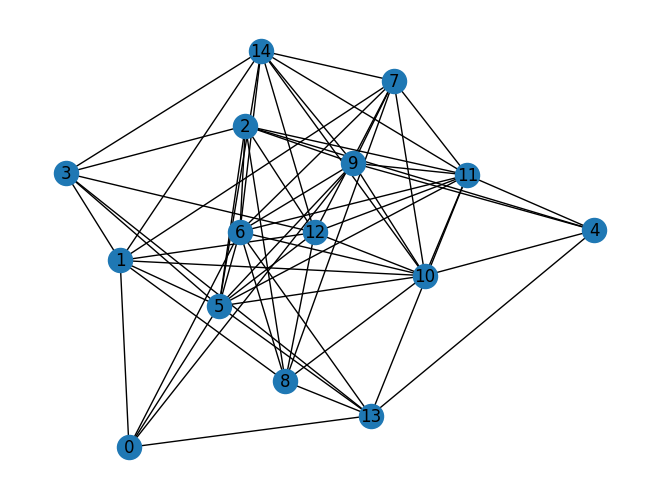

In [69]:
# Create problem graph
rng = np.random.default_rng(seed=42)
graph = nx.erdos_renyi_graph(n=15, p=0.6)
nx.draw(graph, with_labels=True)

In [46]:
%matplotlib inline

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
0   1  0  0  1  1  1  0  1  1  0  0  1  0  0  1  -41.0       1      0.0
1   0  1  1  0  0  0  1  0  0  1  1  0  1  1  0  -41.0      48      0.0
8   0  1  1  0  0  0  1  0  0  1  1  0  1  1  0  -41.0       1 0.066667
2   0  1  0  1  1  1  1  0  1  1  0  1  0  0  0  -40.0       2      0.0
3   1  0  1  0  0  1  0  1  0  0  1  0  0  1  1  -40.0       1      0.0
4   0  1  0  1  1  0  1  0  1  1  0  1  1  0  0  -40.0       3      0.0
5   0  1  1  0  0  0  0  0  0  1  1  0  1  1  1  -40.0       6      0.0
6   0  1  1  0  0  0  1  0  0  1  1  0  1  1  1  -40.0       7      0.0
7   0  1  1  0  0  0  1  0  0  1  0  0  1  1  1  -40.0      12      0.0
20  0  1  1  0  0  0  1  0  0  1  1  0  1  1  1  -40.0       1 0.066667
9   0  1  0  0  1  0  1  0  0  1  0  0  1  1  1  -39.0       1      0.0
10  0  1  1  0  0  0  1  1  0  1  1  0  1  1  0  -39.0       2      0.0
11  0  1  0  1  1  0  1  0  1  1  0  1  0  0  0  -39.0       1  

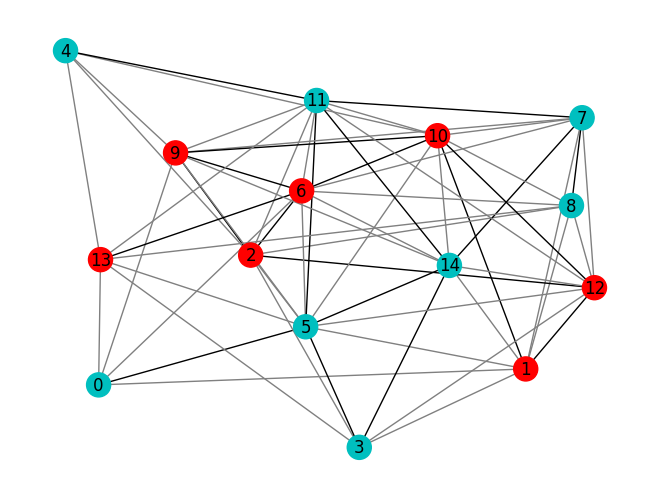

In [72]:
# We will build QUBO
# Remember, both sample_ising() and sample_qubo() are expecting dictionaries
# You can avoid this using BinaryQuadraticModel 

from collections import defaultdict

Q = defaultdict(int)
for i, j in graph.edges:
    Q[(i,i)]+= -1
    Q[(j,j)]+= -1
    Q[(i,j)]+= 2
    
solution = solver.sample_qubo(Q, num_reads=10, annealing_time=10, label='Example - Maximum Cut')
print(solution)

best = solution.first.sample
# Interpret best result in terms of nodes and edges
S0 = [node for node in graph.nodes if not best[node]]
S1 = [node for node in graph.nodes if best[node]]
cut_edges = [(u, v) for u, v in graph.edges if best[u]!=best[v]]
uncut_edges = [(u, v) for u, v in graph.edges if best[u]==best[v]]

# Display best result
nx.draw(graph, node_color=["r" if i in S0 else "c" for i in list(graph.nodes)], with_labels=True, 
       edge_color=["black" if e in uncut_edges else "grey" for e in list(graph.edges)])


## Real-life-like example - Portfolio Optimization

Optimizing a portfolio of stocks is a challenging problem that looks to identify the optimal number of shares of each stock to purchase in order to minimize risk (variance) and maximize returns, while staying under some specified spending budget.

Consider a set of $N$ types of stocks to choose from, with an average monthly return per dollar spent of $r_i$ for each stock $i$. Furthermore, let $\sigma_{i,j}$ be the covariance of the returns of stocks $i$ and $j$. For a spending budget of $B$ dollars, let $x_i$ denote the number of shares of stock $i$ purchased at price $p_i$ per share. Then, this portfolio optimization problem can be represented as

$$
\min \alpha \sum_{i=1}^N \sum_{j=1}^N \sigma_{i,j} p_i x_i p_j x_j - \sum_{i=1}^N r_i p_i x_i \\
\text{s. t.} \sum_{i=1}^N p_i x_i \leq B
$$

Here, $\alpha$ > 0 is the trade-off coefficient between the risk (variance) and the returns, also known as the risk aversion coefficient. Notice that while we are minimizing the variance, we are also minimizing the negative of the return (which is equivalent to maximizing the return).


In [91]:
from dimod import Integer, Binary, quicksum, ConstrainedQuadraticModel
from itertools import product

num_of_stocks = 5
budget = 100
alpha = 0.05
stocks = [f"{i}" for i in range(num_of_stocks)]
avg_return = {s: rng.uniform(0,2) for s in stocks}
price = {s: rng.integers(1, 20) for s in stocks}
cov = rng.uniform(-1,1,size=(num_of_stocks,num_of_stocks))
cov = (cov + cov.T)/2 # symetric matrix


# construct CQM
cqm = ConstrainedQuadraticModel()
x = {s: Integer(f"{s}", lower_bound=0, 
                upper_bound=int(budget/price[s])) for s in stocks} # here we are adding variables to the model
                
cqm.add_constraint(sum([x[s]*price[s] for s in stocks]) <= budget, label='budget')
                
# Defining risk expression 
risk = 0
for s1, s2 in product(stocks, repeat=2):
    coeff = (cov[stocks.index(s1)][stocks.index(s2)] * price[s1] * price[s2])
    risk = risk + coeff*x[s1]*x[s2]

# Defining the returns expression 
returns = 0
for s in stocks: 
    returns = returns + price[s] * avg_return[s] * x[s]     
cqm.set_objective(alpha*risk - returns)
print(cqm)

[[ 0.10598613  0.92277153  0.41737538 -0.06631247 -0.32171314]
 [ 0.92277153  0.43552047  0.07311634 -0.05612191  0.76897557]
 [ 0.41737538  0.07311634  0.176516   -0.01854461 -0.20640328]
 [-0.06631247 -0.05612191 -0.01854461 -0.08290384 -0.44709746]
 [-0.32171314  0.76897557 -0.20640328 -0.44709746  0.99406932]]
Constrained quadratic model: 5 variables, 1 constraints, 25 biases

Objective
  -3.1443998020426287*Integer('0') - 4.72834945874999*Integer('1') - 2.3645339606750664*Integer('2') - 5.6167647802544645*Integer('3') - 12.261313041565092*Integer('4') + 0.13248266313224982*Integer('0')*Integer('0') + 6.920786488220881*Integer('0')*Integer('1') + 4.899605310081978*Integer('1')*Integer('1') + 1.669501511602399*Integer('0')*Integer('2') + 0.8773960600674444*Integer('1')*Integer('2') + 0.5648511998030123*Integer('2')*Integer('2') - 0.09946871105056965*Integer('0')*Integer('3') - 0.2525486021398687*Integer('1')*Integer('3') - 0.044507062921107204*Integer('2')*Integer('3') - 0.037306726

In [95]:
from dwave.system import LeapHybridCQMSampler
hybrid = LeapHybridCQMSampler()

solution = hybrid.sample_cqm(cqm)
print(solution)

      0   1   2    3   4      energy num_oc. is_sat. is_fea.
8   0.0 0.0 0.0 29.0 1.0  -251.23704       1 arra...   False
101 0.0 0.0 0.0 29.0 1.0  -251.23704       1 arra...   False
102 0.0 0.0 0.0 29.0 1.0  -251.23704       1 arra...   False
103 0.0 0.0 0.0 29.0 1.0  -251.23704       1 arra...   False
0   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
1   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
2   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
3   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
4   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
5   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
6   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
7   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
9   0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
10  0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
11  0.0 0.0 0.0 28.0 1.0 -241.615983       1 arra...    True
12  0.0 0.0 0.0 28.0 1.0

# Projects at IITIS


1. Sonata Bis: Simulations of physical systems with near-term annealing technology
    * Simulations of DWaves qpu using tensor networks 
    * Machine Learning for error correction in quantum annealers
2. EuroHPC PL
    * Omnisolver - offload all technical details into this program
    * Omniqubo - automatically create QUBO for a given problem

 # Tips and Tricks
1. It is worth experimenting with different values of parameters. Sometimes more is not better!
2. One can also manipulate the annealing schedule. Among other things, research has shown that introducing pauses can improve results.
3. Hybrid solver can solve many problems and is worth trying!

# Further reading
1. [Quantum Bridge Analytics I: A Tutorial on Formulating and Using QUBO Models](https://arxiv.org/ftp/arxiv/papers/1811/1811.11538.pdf). Fred Glover, Gary Kochenberger and Yu Du. 2019
2. [Example code and notebooks](https://github.com/dwave-examples)
3. Quantum Spin Glasses, Annealing and Computation.  Shu Tanaka, Ryo Tamura and Bikas K. Chakrabarti. 2017
4. Research articles!